In [149]:
import zarr
import sys
import allel
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
#import matplotlib_venn as venn
import seaborn as sns

#### genotypes

In [150]:
callset = zarr.open_group('new_uniref_merged.zarr/', mode='r')
callset

<zarr.hierarchy.Group '/' read-only>

In [151]:
gt = allel.GenotypeArray(callset['calldata/GT'][:])

In [152]:
gt

<GenotypeArray shape=(266548, 136, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [153]:
chrom = callset['variants/CHROM']
chrom[:]

array(['chr2L.1', 'chr2L.1', 'chr2L.1', ..., 'Pf_M76611', 'Pf_M76611',
       'Pf_M76611'], dtype=object)

#### meta data

In [154]:
df_meta = pd.read_csv('1175-VO-KH-STLAURENT-S01-samples.csv', sep=',')
df_meta.columns, len(df_meta)

(Index(['ROMA_ID', 'Sanger_ID', 'Public_name', 'Sample_type', 'Status',
        'External_ID', 'Species_complex', 'Species', 'Collection_date',
        'Collection_time', 'Collection_location', 'GPS', 'Collection_context',
        'Collection_method', 'Sex', 'Specimen_type'],
       dtype='object'), 159)

In [155]:
#new samples to the meta data - we only need some columms
new_meta = pd.DataFrame()
new_meta['ROMA_ID'] = list(np.concatenate([callset['samples'][:10], list(callset['samples'][-5:])]))
new_meta['Status'] = 'sequenced'
new_meta['Species'] = ['An. arabiensis' for _ in range(5)] + ['An. gambiae' for _ in range(5)] + ['An. funestus' for _ in range(5)]
new_meta['Species_complex'] = ['An. arabiensis' for _ in range(5)] + ['An. gambiae' for _ in range(5)] + ['An. funestus' for _ in range(5)]
new_meta['Sample_type'] = 'Genomic DNA'


In [156]:
df_meta = df_meta.append(new_meta, ignore_index=True)

In [157]:
df_meta

,Collection_context,Collection_date,Collection_location,Collection_method,Collection_time,External_ID,GPS,Public_name,ROMA_ID,Sample_type,Sanger_ID,Sex,Species,Species_complex,Specimen_type,Status
0,outdoor,24-Jul-2013,Sayas,cow-baited tent,23.0,1175-S01-0001,13.5476389 / 107.024555,4248STDY6436122,VBS00001,Genomic DNA,4248STDY6436122,Female,An. annularis,An. annularis group,Wild caught adult,sequenced
1,outdoor,24-Jul-2013,Sayas,cow-baited tent,24.0,1175-S01-0002,13.5476389 / 107.024555,4248STDY6436123,VBS00002,Genomic DNA,4248STDY6436123,Female,An. annularis,An. annularis group,Wild caught adult,sequenced
2,outdoor,23-Jul-2013,Sayas,cow-baited tent,20.0,1175-S01-0003,13.5476389 / 107.024555,4248STDY6436124,VBS00003,Genomic DNA,4248STDY6436124,Female,An. annularis,An. annularis group,Wild caught adult,sequenced
3,outdoor,22-Jul-2013,Sayas,cow-baited tent,3.0,1175-S01-0004,13.5476389 / 107.024555,4248STDY6436125,VBS00004,Genomic DNA,4248STDY6436125,Female,An. annularis,An. annularis group,Wild caught adult,sequenced
4,outdoor,21-Jul-2013,Sayas,cow-baited tent,20.0,1175-S01-0005,13.5476389 / 107.024555,4248STDY6436126,VBS00005,Genomic DNA,4248STDY6436126,Female,An. annularis,An. annularis group,Wild caught adult,sequenced
5,outdoor,17-Aug-2013,Angkrong,cow-baited tent,19.0,1175-S01-0006,12.3129167 / 103.570388,4248STDY6436127,VBS00006,Genomic DNA,4248STDY6436127,Female,An. nivipes,An. annularis group,Wild caught adult,sequenced
6,outdoor,16-Aug-2013,Angkrong,cow-baited tent,1.0,1175-S01-0007,12.3129167 / 103.570388,4248STDY6634661,VBS00007,WGA,4248STDY6634661,Female,An. nivipes,An. annularis group,Wild caught adult,Not sequenced
7,outdoor,14-Aug-2013,Angkrong,cow-baited tent,1.0,1175-S01-0008,12.3129167 / 103.570388,4248STDY6436128,VBS00008,Genomic DNA,4248STDY6436128,Female,An. nivipes,An. annularis group,Wild caught adult,sequenced
8,outdoor,17-Aug-2013,Angkrong,cow-baited tent,20.0,1175-S01-0009,12.3129167 / 103.570388,4248STDY6436129,VBS00009,Genomic DNA,4248STDY6436129,Female,An. nivipes,An. annularis group,Wild caught adult,sequenced
9,outdoor,17-Aug-2013,Angkrong,cow-baited tent,21.0,1175-S01-0010,12.3129167 / 103.570388,4248STDY6436130,VBS00010,Genomic DNA,4248STDY6436130,Female,An. nivipes,An. annularis group,Wild caught adult,sequenced


In [158]:
#keep only sequenced
df_meta_seq = df_meta[df_meta.Status == 'sequenced']
len(df_meta_seq)

143

In [159]:
#sort the meta data so in the same order as the genotypes
df_meta_seq = df_meta_seq.sort_values('ROMA_ID')

In [160]:
df_meta_seq.head()

,Collection_context,Collection_date,Collection_location,Collection_method,Collection_time,External_ID,GPS,Public_name,ROMA_ID,Sample_type,Sanger_ID,Sex,Species,Species_complex,Specimen_type,Status
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0007-C,Genomic DNA,NaN,NaN,An. arabiensis,An. arabiensis,NaN,sequenced
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0017-C,Genomic DNA,NaN,NaN,An. arabiensis,An. arabiensis,NaN,sequenced
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0030-C,Genomic DNA,NaN,NaN,An. arabiensis,An. arabiensis,NaN,sequenced
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0049-C,Genomic DNA,NaN,NaN,An. arabiensis,An. arabiensis,NaN,sequenced
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC0075-C,Genomic DNA,NaN,NaN,An. arabiensis,An. arabiensis,NaN,sequenced


In [161]:
all_128_samples = np.asarray(df_meta_seq.ROMA_ID)

In [162]:
all_128_samples

array(['AC0007-C', 'AC0017-C', 'AC0030-C', 'AC0049-C', 'AC0075-C',
       'AC0092-C', 'AC0115-C', 'AC0140-C', 'AC0174-C', 'AC0199-C',
       'VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00005',
       'VBS00006', 'VBS00008', 'VBS00009', 'VBS00010', 'VBS00011',
       'VBS00012', 'VBS00013', 'VBS00014', 'VBS00015', 'VBS00017',
       'VBS00018', 'VBS00019', 'VBS00020', 'VBS00021', 'VBS00022',
       'VBS00023', 'VBS00024', 'VBS00025', 'VBS00026', 'VBS00029',
       'VBS00030', 'VBS00031', 'VBS00032', 'VBS00033', 'VBS00034',
       'VBS00035', 'VBS00036', 'VBS00037', 'VBS00038', 'VBS00039',
       'VBS00040', 'VBS00041', 'VBS00042', 'VBS00043', 'VBS00044',
       'VBS00045', 'VBS00046', 'VBS00047', 'VBS00048', 'VBS00049',
       'VBS00050', 'VBS00051', 'VBS00052', 'VBS00053', 'VBS00055',
       'VBS00059', 'VBS00061', 'VBS00063', 'VBS00064', 'VBS00065',
       'VBS00066', 'VBS00068', 'VBS00069', 'VBS00071', 'VBS00072',
       'VBS00074', 'VBS00075', 'VBS00076', 'VBS00078', 'VBS000

#### remove pf gene

In [163]:
gt.shape

(266548, 136, 2)

In [164]:
pfbool = chrom[:]!='Pf_M76611'
gt_nopf = gt.compress(pfbool)
gt_nopf.shape

(260581, 136, 2)

#### missingness

In [165]:
#first 10 and last 5 are the new samples, we want to keep these.
callset['samples'][:]

array(['AC0007-C', 'AC0017-C', 'AC0030-C', 'AC0049-C', 'AC0075-C',
       'AC0092-C', 'AC0115-C', 'AC0140-C', 'AC0174-C', 'AC0199-C',
       'VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00006',
       'VBS00008', 'VBS00009', 'VBS00010', 'VBS00011', 'VBS00012',
       'VBS00013', 'VBS00014', 'VBS00015', 'VBS00017', 'VBS00019',
       'VBS00020', 'VBS00021', 'VBS00022', 'VBS00023', 'VBS00024',
       'VBS00025', 'VBS00026', 'VBS00029', 'VBS00030', 'VBS00031',
       'VBS00032', 'VBS00033', 'VBS00034', 'VBS00035', 'VBS00036',
       'VBS00037', 'VBS00038', 'VBS00039', 'VBS00040', 'VBS00041',
       'VBS00042', 'VBS00043', 'VBS00044', 'VBS00045', 'VBS00046',
       'VBS00047', 'VBS00048', 'VBS00049', 'VBS00050', 'VBS00051',
       'VBS00052', 'VBS00053', 'VBS00055', 'VBS00059', 'VBS00061',
       'VBS00063', 'VBS00064', 'VBS00065', 'VBS00066', 'VBS00068',
       'VBS00069', 'VBS00071', 'VBS00072', 'VBS00074', 'VBS00075',
       'VBS00076', 'VBS00078', 'VBS00079', 'VBS00081', 'VBS000

In [166]:
ismiss = gt_nopf.is_missing()
persam_ismiss = np.sum(ismiss, axis=0)
persam_ismiss.shape

(136,)

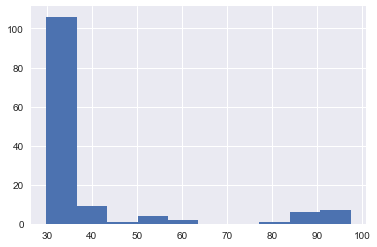

In [167]:
#plot
persam_rate = persam_ismiss/260581*100
plt.hist(persam_rate);

In [168]:
#eyeballing plot - keep samples with <40% missingness - loose 25 samples
persam_bool = persam_rate <= 40
np.count_nonzero(persam_bool)

111

In [169]:
#keep track of the samples we have left
gud_samples = np.asarray(callset['samples']).compress(persam_bool)
len(gud_samples)

111

In [170]:
#looks fine, we keep the new outgroups
gud_samples

array(['AC0007-C', 'AC0017-C', 'AC0030-C', 'AC0049-C', 'AC0075-C',
       'AC0092-C', 'AC0115-C', 'AC0140-C', 'AC0174-C', 'AC0199-C',
       'VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00008',
       'VBS00009', 'VBS00010', 'VBS00011', 'VBS00012', 'VBS00013',
       'VBS00014', 'VBS00015', 'VBS00017', 'VBS00020', 'VBS00021',
       'VBS00022', 'VBS00023', 'VBS00024', 'VBS00025', 'VBS00026',
       'VBS00029', 'VBS00030', 'VBS00031', 'VBS00032', 'VBS00033',
       'VBS00034', 'VBS00035', 'VBS00036', 'VBS00037', 'VBS00038',
       'VBS00040', 'VBS00041', 'VBS00043', 'VBS00044', 'VBS00045',
       'VBS00046', 'VBS00047', 'VBS00048', 'VBS00049', 'VBS00050',
       'VBS00052', 'VBS00059', 'VBS00066', 'VBS00068', 'VBS00069',
       'VBS00071', 'VBS00072', 'VBS00074', 'VBS00075', 'VBS00076',
       'VBS00078', 'VBS00079', 'VBS00082', 'VBS00083', 'VBS00085',
       'VBS00086', 'VBS00087', 'VBS00088', 'VBS00090', 'VBS00091',
       'VBS00094', 'VBS00096', 'VBS00097', 'VBS00098', 'VBS000

In [171]:
#compress genotype array to keep just gud samples
gt_gudsam = gt_nopf.compress(persam_bool, axis=1)
gt_gudsam.shape

(260581, 111, 2)

In [172]:
#compress meta data to just keep the info for the gud samples
gudsam_bool = np.in1d(all_128_samples, gud_samples)
df_meta_gud = df_meta_seq[gudsam_bool]
df_meta_gud.shape

(111, 16)

In [173]:
#3. look at per var missingness
ismissvar = gt_gudsam.is_missing()
pervar_ismiss = np.sum(ismissvar, axis=1)
pervar_ismiss.shape

(260581,)

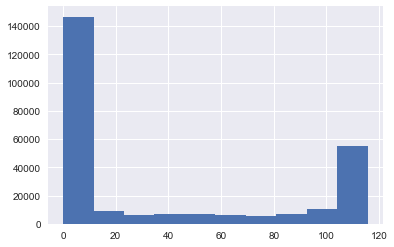

In [174]:
pervar_rate = pervar_ismiss/96*100
plt.hist(pervar_rate);

In [175]:
#how many var do we have with 0 missingness?
full = pervar_rate == 0
np.count_nonzero(full)

96440

#### with no missingness

In [176]:
#if we just use the 0 missingness sites what happens?
gt_nomiss = gt_gudsam.compress(full)
gt_nomiss

<GenotypeArray shape=(96440, 111, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

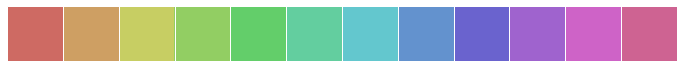

In [177]:
#palette
palette = sns.color_palette('hls', n_colors=12, desat=0.8)
sns.palplot(palette);

In [178]:
#use names and palette to define plotting colours

colors = {
    'An. annularis group': palette[0],
    'An. hyrcanus group': palette[3],
    'An. maculatus group': palette[4],
    'An. kochi group': palette[5],
    'An. funestus group': palette[6],
    'An. barbirostris group': palette[7],
    'An. dirus complex': palette[9],
    '': palette[10],
    'An. gambiae': 'r',
    'An. arabiensis':'g',
    'An. funestus': 'b'
}


labels = {
    'An. annularis group': 'An. annularis group',
    'An. hyrcanus group': 'An. hyrcanus group',
    'An. maculatus group':'An. maculatus group',
    'An. kochi group': 'An. kochi group',
    'An. funestus group': 'An. funestus group',
    'An. barbirostris group': 'An. barbirostris group',
    'An. dirus complex':'An. dirus complex',
    'An. gambiae': 'An. gambiae',
    'An. arabiensis': 'An. arabiensis',
    'An. funestus': 'An. funestus',
    '':'other'
}

In [179]:
#fix the df NaNs
df_meta_gud = df_meta_gud.fillna(value='')
#names so we can add labels etc
vbs = np.asarray(df_meta_gud.ROMA_ID)
vsc = np.asarray(df_meta_gud.Species_complex)
vsp = np.asarray(df_meta_gud.Species)

In [180]:
#remove the WGA samples too?
isitnotWGA = df_meta_gud.Sample_type == "Genomic DNA"
np.count_nonzero(isitnotWGA)

98

In [181]:
gt_nowga = gt_nomiss.compress(isitnotWGA, axis=1)
gt_nowga

<GenotypeArray shape=(96440, 98, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [182]:
df_meta_nowga = df_meta_gud[isitnotWGA]
df_meta_nowga.shape

(98, 16)

In [183]:
#names so we can add labels etc
vbs = np.asarray(df_meta_nowga.ROMA_ID)
vsc = np.asarray(df_meta_nowga.Species_complex)
vsp = np.asarray(df_meta_nowga.Species)

In [184]:
#measure distance and cluster samples
d = allel.stats.pairwise_distance(gt_nowga.to_n_alt(), metric='cityblock')
z = scipy.cluster.hierarchy.linkage(d, method='average')

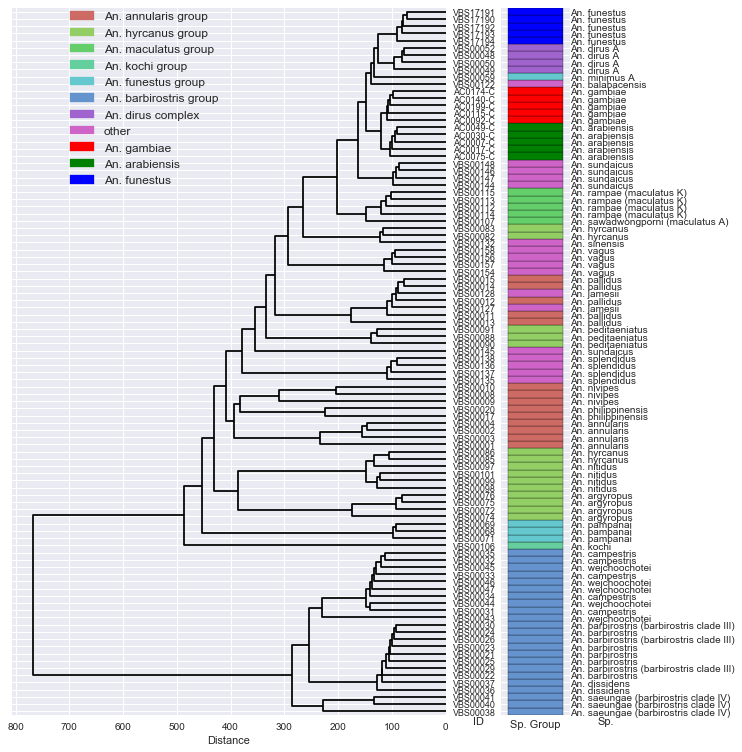

In [185]:
#plot
fig = plt.figure(figsize=(10, 13), )
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(2.5, 0.4), wspace=0.22)

#dendro
ax = fig.add_subplot(gs[0, 0])
sns.despine(ax=ax, left=True, right=True, bottom=False)
r = scipy.cluster.hierarchy.dendrogram(
    z, no_labels=False, count_sort=True, 
    color_threshold=0, labels=vbs,
    above_threshold_color='k',
    ax=ax, leaf_font_size=9, orientation='left')
ax.set_xlabel('Distance', size=11)
#legend
handles = [mpl.patches.Patch(color=colors[p], label=labels[p]) for p in list(colors.keys())]
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.5, 1.011), ncol=1, fontsize=12)

#colour bar
ax = fig.add_subplot(gs[0, 1])
sns.despine(ax=ax, left=True, right=True, bottom=True)
#get the clustered order of samples
sp_com = vsc[r['leaves']]
#make list of species complex colours to match the clustered sample order
sp_com_colors = [colors[p] for p in sp_com]
#plot
ax.bar(left=np.full((len(vbs)), 0.5), height=np.full((len(vbs)), 1), bottom=np.asarray(range(0,len(vbs))), color=sp_com_colors, edgecolor='k')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_ylim(0,len(vbs))
ax.set_xlabel('Sp. Group', size=11)
ax.set_yticks(np.arange(len(vbs))+0.5)
ax.set_yticklabels(vsp[r['leaves']], ha='left', position=(1.1,2), fontsize=10)
ax.tick_params(length=0.0)
ax.text(-0.4, -1.3, 'ID', fontsize=11)
ax.text(1.4, -1.3, 'Sp.', fontsize=11)

#fig.savefig('../uniref_nomissing_nocrapsamp_noWGA.jpeg', jpeg_quality=100, bbox_inches='tight');

In [186]:
#use different metrics

#these seem to generate the cleanest clusters, using method=average is less good
d = allel.stats.pairwise_distance(gt_nowga.to_n_alt(), metric='cityblock')
z = scipy.cluster.hierarchy.linkage(d, method='complete')

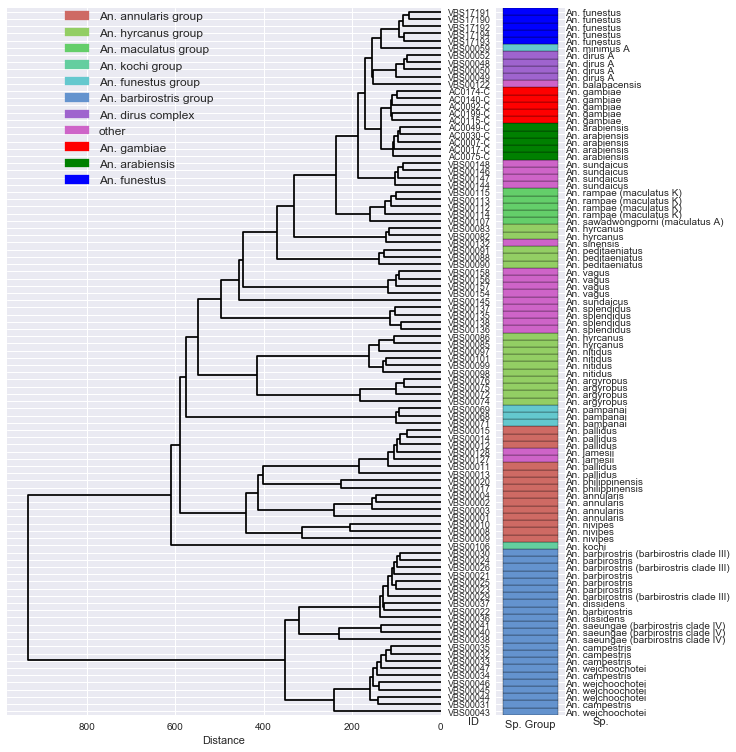

In [187]:
#plot
fig = plt.figure(figsize=(10, 13), )
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(2.5, 0.4), wspace=0.22)

#dendro
ax = fig.add_subplot(gs[0, 0])
sns.despine(ax=ax, left=True, right=True, bottom=False)
r = scipy.cluster.hierarchy.dendrogram(
    z, no_labels=False, count_sort=True, 
    color_threshold=0, labels=vbs,
    above_threshold_color='k',
    ax=ax, leaf_font_size=9, orientation='left')
ax.set_xlabel('Distance', size=11)
#legend
handles = [mpl.patches.Patch(color=colors[p], label=labels[p]) for p in list(colors.keys())]
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.5, 1.011), ncol=1, fontsize=12)

#colour bar
ax = fig.add_subplot(gs[0, 1])
sns.despine(ax=ax, left=True, right=True, bottom=True)
#get the clustered order of samples
sp_com = vsc[r['leaves']]
#make list of species complex colours to match the clustered sample order
sp_com_colors = [colors[p] for p in sp_com]
#plot
ax.bar(left=np.full((len(vbs)), 0.5), height=np.full((len(vbs)), 1), bottom=np.asarray(range(0,len(vbs))), color=sp_com_colors, edgecolor='k')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_ylim(0,len(vbs))
ax.set_xlabel('Sp. Group', size=11)
ax.set_yticks(np.arange(len(vbs))+0.5)
ax.set_yticklabels(vsp[r['leaves']], ha='left', position=(1.1,2), fontsize=10)
ax.tick_params(length=0.0)
ax.text(-0.4, -1.3, 'ID', fontsize=11)
ax.text(1.4, -1.3, 'Sp.', fontsize=11);

#### all variants?

In [188]:
#take the all var-gud sample genotype, remove the WGA samples then cluster
gt_gudsam

<GenotypeArray shape=(260581, 111, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [189]:
gt_al = gt_gudsam.compress(isitnotWGA, axis=1)
gt_al

<GenotypeArray shape=(260581, 98, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [190]:
#measure distance and cluster samples
d = allel.stats.pairwise_distance(gt_al.to_n_alt(), metric='cityblock')
z = scipy.cluster.hierarchy.linkage(d, method='complete')

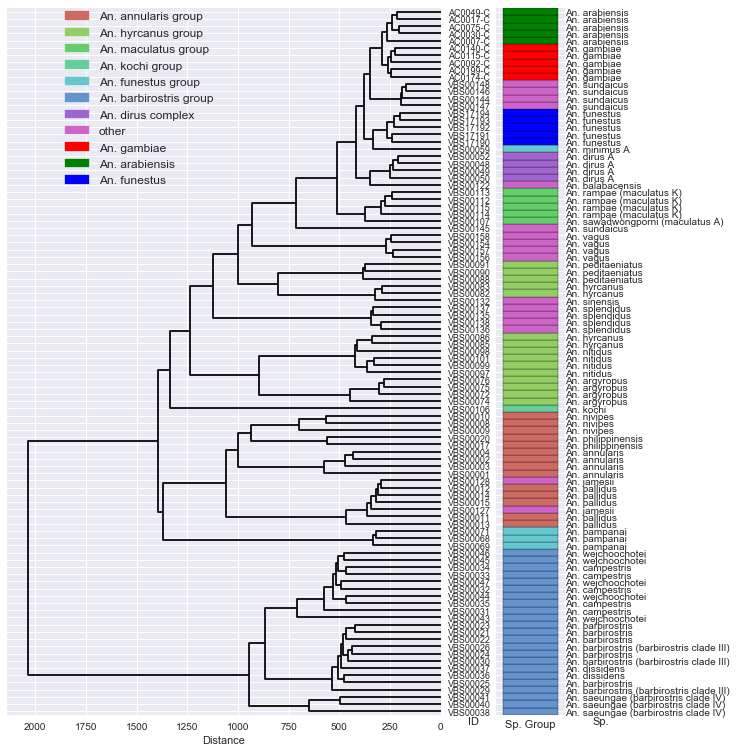

In [192]:
#plot
fig = plt.figure(figsize=(10, 13), )
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(2.5, 0.4), wspace=0.22)

#dendro
ax = fig.add_subplot(gs[0, 0])
sns.despine(ax=ax, left=True, right=True, bottom=False)
r = scipy.cluster.hierarchy.dendrogram(
    z, no_labels=False, count_sort=True, 
    color_threshold=0, labels=vbs,
    above_threshold_color='k',
    ax=ax, leaf_font_size=9, orientation='left')
ax.set_xlabel('Distance', size=11)
#legend
handles = [mpl.patches.Patch(color=colors[p], label=labels[p]) for p in list(colors.keys())]
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.5, 1.011), ncol=1, fontsize=12)

#colour bar
ax = fig.add_subplot(gs[0, 1])
sns.despine(ax=ax, left=True, right=True, bottom=True)
#get the clustered order of samples
sp_com = vsc[r['leaves']]
#make list of species complex colours to match the clustered sample order
sp_com_colors = [colors[p] for p in sp_com]
#plot
ax.bar(left=np.full((len(vbs)), 0.5), height=np.full((len(vbs)), 1), bottom=np.asarray(range(0,len(vbs))), color=sp_com_colors, edgecolor='k')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_ylim(0,len(vbs))
ax.set_xlabel('Sp. Group', size=11)
ax.set_yticks(np.arange(len(vbs))+0.5)
ax.set_yticklabels(vsp[r['leaves']], ha='left', position=(1.1,2), fontsize=10)
ax.tick_params(length=0.0)
ax.text(-0.4, -1.3, 'ID', fontsize=11)
ax.text(1.4, -1.3, 'Sp.', fontsize=11)

fig.savefig('../NEW_uniref_nomissing_nocrapsamp_noWGA_allvar.jpeg', jpeg_quality=100, bbox_inches='tight');